<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/machine_learning_text_classification_and_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import re, string
import pkg_resources
from textblob import TextBlob
from sklearn import metrics
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data_Science/bbc-text.csv')
df = df.sample(frac = 0.5).iloc[0:2000]
df

,category,text
907,politics,butler launches attack on blair former civil s...
1300,politics,milburn defends poster campaign labour s elect...
610,tech,broadband fuels online expression fast web acc...
564,sport,dawson set for new wasps contract european cha...
356,politics,green fear for transport ballot the green part...
...,...,...
1843,politics,ministers deny care sums wrong ministers hav...
1209,entertainment,queen recruit singer for new tour the remainin...
1222,tech,us top of supercomputing charts the us has pus...
82,politics,straw praises kashmir moves the uk has welcome...


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def message_cleaning(message):
    test_punc_removed = [char   for char in message if char not in string.punctuation]
    test_punc_removed_joined = ''.join(test_punc_removed)
    test_punc_removed_joined_clean = [word   for word in test_punc_removed_joined.split(' ') if word not in stopwords.words('english')]
    return test_punc_removed_joined_clean



tfidf_vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", norm='l2')
# count_vectorizer = CountVectorizer(analyzer=message_cleaning)
# nve_vctorizer = tfidf_vectorizer.fit_transform(df['text'])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
X = df['text']
Y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [13]:
LR = LogisticRegression()
SVC = SVC()

In [14]:
#Creating Pipeline
LRpipeline1 = Pipeline([('vect', tfidf_vectorizer),
                     ('chi',  SelectKBest(chi2, k=6000)),
                     ('clf', LogisticRegression(random_state=0))])
model1 = LRpipeline1.fit(X_train, y_train)

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
LinearSVC
SVCpipeline = Pipeline([
    ('bow', tfidf_vectorizer),
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearSVC(C=6000)),  # train on TF-IDF vectors w/ SVM
])

# SVCpipeline = Pipeline([
#     ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
#     ('clf', SVC(C=6000))
# ])
model2 = SVCpipeline.fit(X_train, y_train)

In [16]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
print(accuracy_score(y_test,predict1))
print('\n')
print(accuracy_score(y_test,predict2))
print('\n')

0.9700598802395209


0.9820359281437125




In [19]:
# error1 = metrics.mean_absolute_error(y_test,predict1)
# error2 = metrics.mean_squared_error(y_test,predict2)
# print(error1,error2)

               precision    recall  f1-score   support

     business       0.97      0.98      0.97        97
entertainment       0.94      0.94      0.94        34
     politics       0.92      0.92      0.92        53
        sport       1.00      1.00      1.00        93
         tech       0.98      0.96      0.97        57

     accuracy                           0.97       334
    macro avg       0.96      0.96      0.96       334
 weighted avg       0.97      0.97      0.97       334



<Axes: >

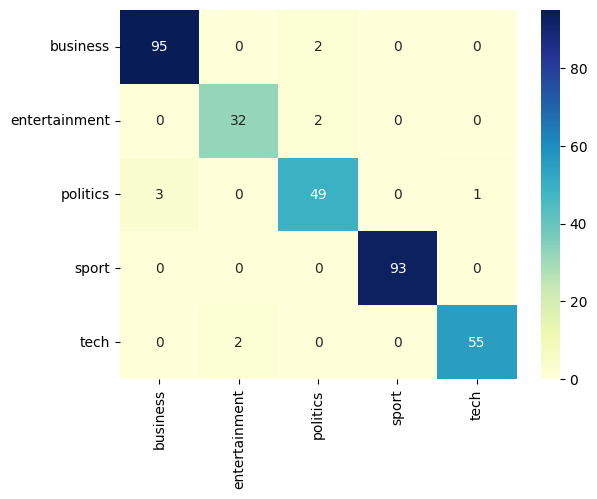

In [20]:
#confusion matrix for LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predict1))

cm = confusion_matrix(y_test,predict1)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['business', 'entertainment','politics','sport','tech'],
                                 index=['business', 'entertainment','politics','sport','tech'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

               precision    recall  f1-score   support

     business       1.00      0.96      0.98        97
entertainment       0.94      1.00      0.97        34
     politics       0.95      1.00      0.97        53
        sport       0.99      1.00      0.99        93
         tech       1.00      0.96      0.98        57

     accuracy                           0.98       334
    macro avg       0.98      0.98      0.98       334
 weighted avg       0.98      0.98      0.98       334



<Axes: >

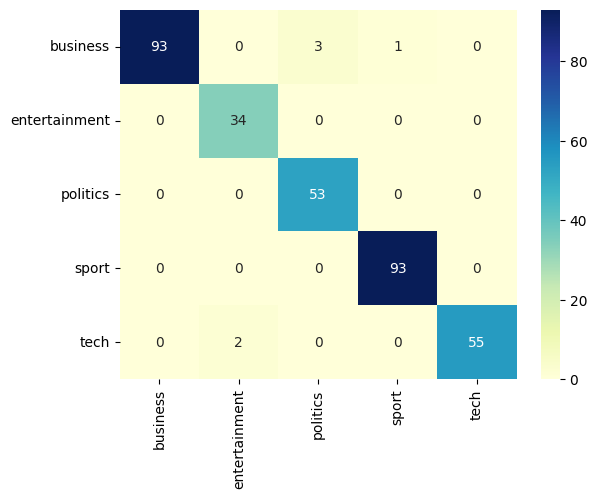

In [21]:
#confusion matrix for LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predict2))

cm = confusion_matrix(y_test,predict2)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['business', 'entertainment','politics','sport','tech'],
                                 index=['business', 'entertainment','politics','sport','tech'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')